<a href="https://colab.research.google.com/github/sirivarshini3339/ML-project/blob/main/News_Navigator_ML_Classification_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded successfully. Head of the dataset:
        category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB

Checking for null values:
category    0
text        0
dtype: int64

Category Distribution:
category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: in

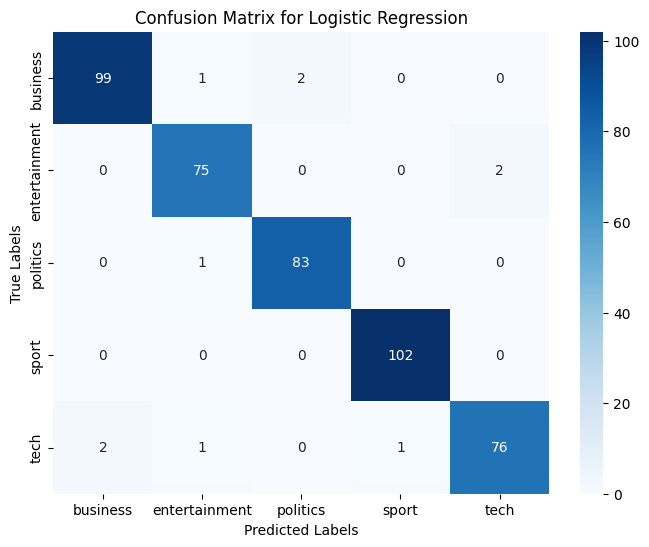


--- Training and evaluating: Naïve Bayes ---
Accuracy for Naïve Bayes: 0.9775
Classification Report for Naïve Bayes:
               precision    recall  f1-score   support

     business       0.97      0.97      0.97       102
entertainment       0.99      0.97      0.98        77
     politics       0.95      0.98      0.96        84
        sport       0.99      1.00      1.00       102
         tech       0.99      0.96      0.97        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445

Confusion Matrix for Naïve Bayes:
[[ 99   0   3   0   0]
 [  0  75   1   0   1]
 [  1   1  82   0   0]
 [  0   0   0 102   0]
 [  2   0   0   1  77]]


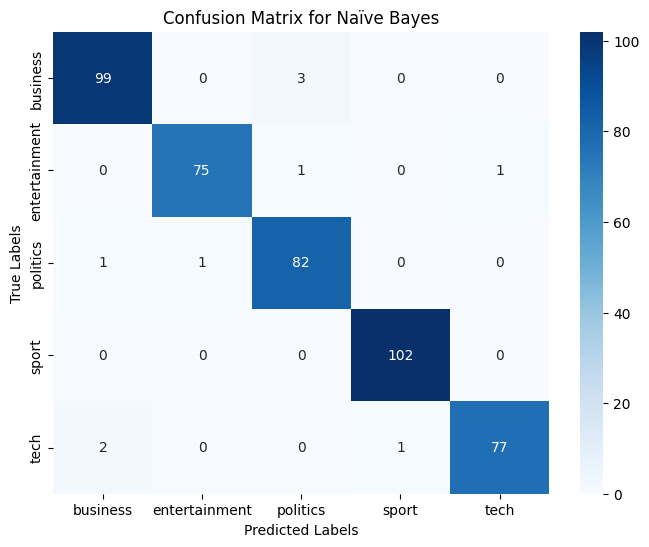


--- Training and evaluating: Support Vector Machine ---
Accuracy for Support Vector Machine: 0.9753
Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

     business       0.98      0.95      0.97       102
entertainment       0.94      0.99      0.96        77
     politics       0.98      0.99      0.98        84
        sport       1.00      1.00      1.00       102
         tech       0.97      0.95      0.96        80

     accuracy                           0.98       445
    macro avg       0.97      0.98      0.97       445
 weighted avg       0.98      0.98      0.98       445

Confusion Matrix for Support Vector Machine:
[[ 97   2   2   0   1]
 [  0  76   0   0   1]
 [  0   1  83   0   0]
 [  0   0   0 102   0]
 [  2   2   0   0  76]]


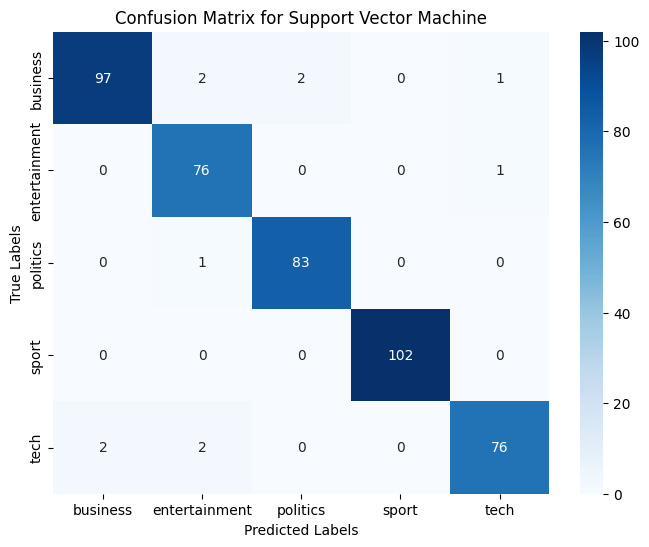


--- Training and evaluating: Random Forest ---
Accuracy for Random Forest: 0.9730
Classification Report for Random Forest:
               precision    recall  f1-score   support

     business       0.95      0.96      0.96       102
entertainment       1.00      0.99      0.99        77
     politics       0.96      0.95      0.96        84
        sport       0.97      1.00      0.99       102
         tech       0.99      0.96      0.97        80

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445

Confusion Matrix for Random Forest:
[[ 98   0   2   1   1]
 [  0  76   1   0   0]
 [  3   0  80   1   0]
 [  0   0   0 102   0]
 [  2   0   0   1  77]]


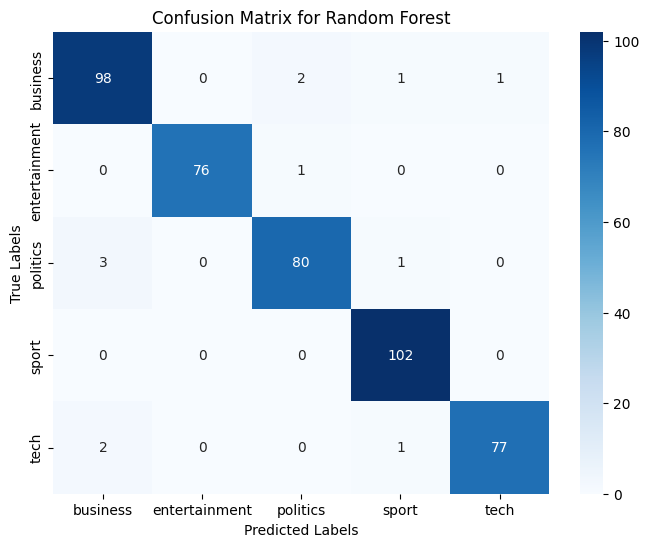


--- Overall Model Accuracy Comparison ---
Model                     Accuracy (%)   
----------------------------------------
Logistic Regression       97.75          
Naïve Bayes               97.75          
Support Vector Machine    97.53          
Random Forest             97.30          


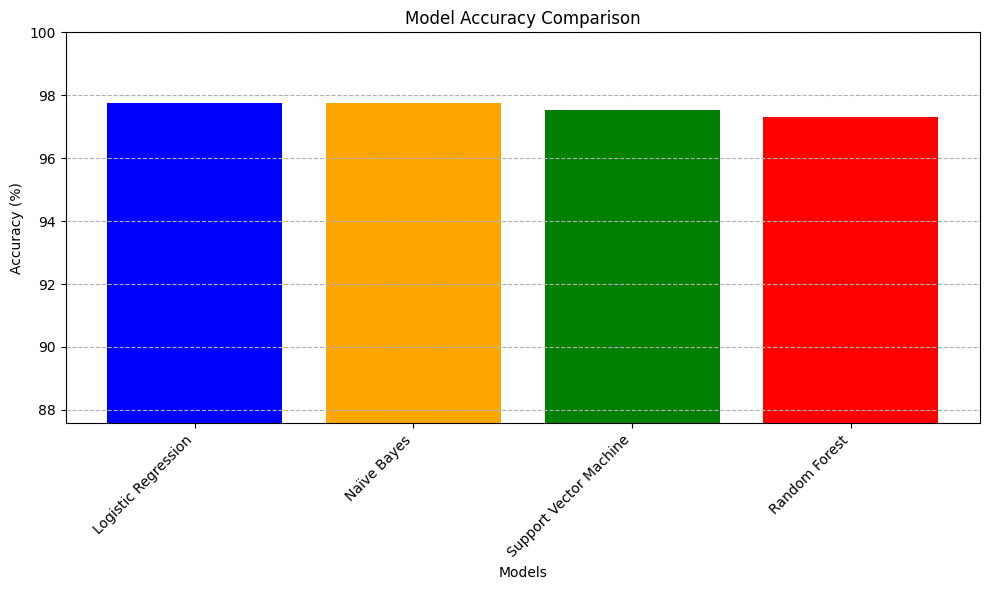

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Load Dataset ---
# IMPORTANT: Replace 'your_bbc_news_dataset.csv' with the correct path to your CSV file.
# Ensure your CSV has columns named 'text' (for news content) and 'category' (for labels).
# Example: df = pd.read_csv('data/bbc_news_articles.csv')
df = pd.read_csv('/content/bbc-text.csv')

# If your CSV uses a different delimiter (e.g., tab-separated), use:
# df = pd.read_csv('your_bbc_news_dataset.csv', delimiter='\t')

# If your text and category columns have different names, rename them like this:
# df = df.rename(columns={'your_text_column_name': 'text', 'your_category_column_name': 'category'})

print("Dataset loaded successfully. Head of the dataset:")
print(df.head())
print("\nDataset Info:")
df.info()

# --- 2. Data Preprocessing ---
# Check for null values in the DataFrame
print("\nChecking for null values:")
print(df.isnull().sum())

# Display category distribution
print("\nCategory Distribution:")
category_counts = df['category'].value_counts()
print(category_counts)

# Visualization of Category Distribution (Pie Chart) - requires matplotlib and seaborn
# Uncomment the following lines to display the plot if running in an environment that supports it
"""
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette("pastel"))
plt.title('Category Distribution in Dataset')
plt.show()
"""

# --- 3. Features and Labels Selection ---
X = df['text']  # The 'text' column contains the news articles/headlines (features)
y = df['category'] # The 'category' column contains the labels

# --- 4. Partitioning of the Dataset ---
# Splitting the dataset into training (80%) and testing (20%) sets.
# stratify=y ensures that the proportion of target variable 'y' is the same in both
# the training and testing sets, which is crucial for imbalanced datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nDataset split into Training ({len(X_train)} samples) and Testing ({len(X_test)} samples).")

# --- 5. Text Vectorization (TF-IDF) ---
# Initialize TF-IDF Vectorizer.
# max_features limits the number of features (vocabulary size) to the most frequent ones.
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features based on your dataset size and complexity

# Fit the vectorizer on the training data and transform both training and testing data.
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("\nText vectorization completed using TF-IDF.")
print(f"Number of features (vocabulary size): {X_train_tfidf.shape[1]}")

# --- 6. Model Selection and Training & Evaluation ---
# Define the machine learning models to be used
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, solver='liblinear'),
    # Increased max_iter for convergence, 'liblinear' solver works well for small datasets and L1/L2 regularization
    "Naïve Bayes": MultinomialNB(),
    # Multinomial Naive Bayes is suitable for text classification with TF-IDF features
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    # Linear kernel is often effective for text classification
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Dictionaries to store results for comparison
accuracy_scores = {}
classification_reports_dict = {}
confusion_matrices_dict = {}

print("\n--- Model Training and Evaluation ---")
for name, model in models.items():
    print(f"\n--- Training and evaluating: {name} ---")

    # Train the model
    model.fit(X_train_tfidf, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_tfidf)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    # The `zero_division=0` argument handles cases where a class has no predicted samples,
    # preventing errors and setting precision/recall/f1-score for that class to 0.
    report = classification_report(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    accuracy_scores[name] = accuracy
    classification_reports_dict[name] = report
    confusion_matrices_dict[name] = cm

    # Print results
    print(f"Accuracy for {name}: {accuracy:.4f}")
    print(f"Classification Report for {name}:\n{report}")
    print(f"Confusion Matrix for {name}:\n{cm}")

    # Visualization of Confusion Matrix (Heatmap) - requires matplotlib and seaborn
    # Uncomment the following lines to display the plot if running in an environment that supports it

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


# --- 7. Model Comparison ---
print("\n--- Overall Model Accuracy Comparison ---")
print("{:<25} {:<15}".format("Model", "Accuracy (%)"))
print("-" * 40)
for name, accuracy in accuracy_scores.items():
    print("{:<25} {:<15.2f}".format(name, accuracy * 100))

# Visualization of Model Accuracy Comparison (Bar Chart) - requires matplotlib and seaborn
# Uncomment the following lines to display the plot if running in an environment that supports it

models_names = list(accuracy_scores.keys())
accuracies = [acc * 100 for acc in accuracy_scores.values()]

plt.figure(figsize=(10, 6))
plt.bar(models_names, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(min(accuracies) * 0.9, 100) # Adjust y-axis for better visualization, starting near the lowest accuracy
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()
